<a href="https://colab.research.google.com/github/hkumarks/Deep_Learning/blob/main/Dog_cat_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
import os

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
zip_dir=tf.keras.utils.get_file('cats_and_dogs_filtered.zip',
                               origin='https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip',
                               extract=True)

68608000/68606236 [==============================] - 1s 0us/step


In [7]:
dir_arc=os.path.dirname(zip_dir)
!find $dir_arc -type d -print

/root/.keras/datasets
/root/.keras/datasets/cats_and_dogs_filtered
/root/.keras/datasets/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs
/root/.keras/datasets/cats_and_dogs_filtered/train/cats
/root/.keras/datasets/cats_and_dogs_filtered/validation
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs
/root/.keras/datasets/cats_and_dogs_filtered/validation/cats


In [8]:
base_dir=os.path.join(os.path.dirname(zip_dir),'cats_and_dogs_filtered')
train_dir=os.path.join(base_dir,'train')
test_dir=os.path.join(base_dir,'validation')

In [9]:
train_cat_dir=os.path.join(train_dir,'cats')
train_dog_dir=os.path.join(train_dir,'dogs')
test_cat_dir=os.path.join(test_dir,'cats')
test_dog_dir=os.path.join(test_dir,'dogs')

In [30]:
num_cats_tr = len(os.listdir(train_cat_dir))
num_dogs_tr = len(os.listdir(train_dog_dir))

num_cats_val = len(os.listdir(test_cat_dir))
num_dogs_val = len(os.listdir(test_dog_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [11]:
print(f'No. of cats image in training= {len(os.listdir(train_cat_dir))}')
print(f'No. of dogs image in training= {len(os.listdir(train_dog_dir))}')
print()
print(f'No. of cats image for testing= {len(os.listdir(test_cat_dir))}')
print(f'No. of cats image for testing= {len(os.listdir(test_cat_dir))}')

No. of cats image in training= 1000
No. of dogs image in training= 1000

No. of cats image for testing= 500
No. of cats image for testing= 500


In [12]:
train_image_generator=ImageDataGenerator(rescale=1./255)
test_image_generator=ImageDataGenerator(rescale=1./255)

In [15]:
train_data_gen=train_image_generator.flow_from_directory(
    directory=train_dir,
    target_size=(150,150),
    batch_size=100,
    shuffle=True,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.


In [17]:
test_data_gen=test_image_generator.flow_from_directory(
    directory=test_dir,
    target_size=(150,150),
    batch_size=100,
    shuffle=True,
    class_mode='binary'
)

Found 1000 images belonging to 2 classes.


In [18]:
sample_training,_=next(train_data_gen)

In [21]:
def plotImages(arr):
  fig,axes=plt.subplots(1,5,figsize=(20,20))
  axes=axes.flatten()
  for img,ax in zip(arr,axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()  

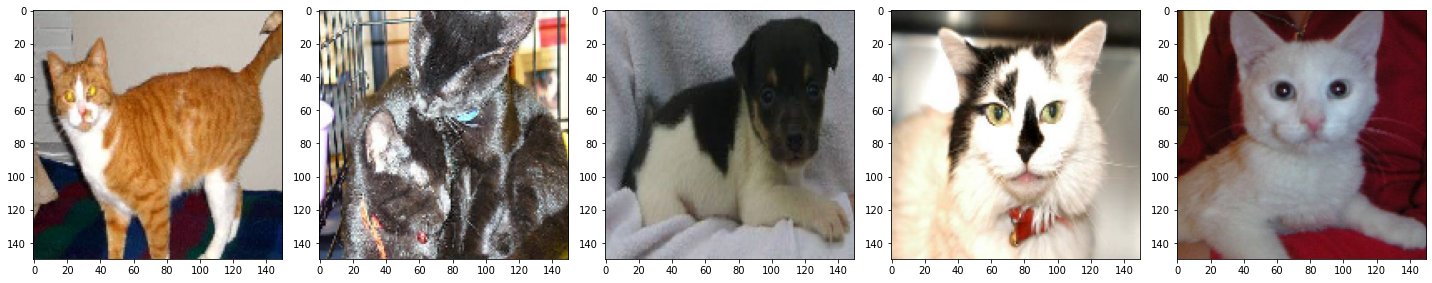

In [22]:
plotImages(sample_training[:5])

In [26]:
model=tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
        tf.keras.layers.MaxPooling2D(2,2),

        tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),

        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
    
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(2)

])

In [27]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 15, 15, 128)      

In [31]:
history=model.fit_generator(
    generator=train_data_gen,
    steps_per_epoch=int(np.ceil(total_train/float(100))),
    epochs=100,
    validation_data=test_data_gen,
    validation_steps=int(np.ceil(total_val/float(100)))
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
20/20 [==============================] - 8s 392ms/step - loss: 0.7117 - accuracy: 0.5175 - val_loss: 0.6925 - val_accuracy: 0.5000
Epoch 2/100
20/20 [==============================] - 8s 384ms/step - loss: 0.6896 - accuracy: 0.5005 - val_loss: 0.6746 - val_accuracy: 0.5770
Epoch 3/100
20/20 [==============================] - 8s 377ms/step - loss: 0.6671 - accuracy: 0.5930 - val_loss: 0.6444 - val_accuracy: 0.6360
Epoch 4/100
20/20 [==============================] - 8s 380ms/step - loss: 0.6332 - accuracy: 0.6525 - val_loss: 0.6327 - val_accuracy: 0.6610
Epoch 5/100
20/20 [==============================] - 8s 377ms/step - loss: 0.5962 - accuracy: 0.6900 - val_loss: 0.6046 - val_accuracy: 0.6800
Epoch 6/100
20/20 [==============================] - 8s 384ms/step - loss: 0.5464 - accuracy: 0.7295 - val_loss: 0.5798 - val_accuracy: 0.7040
Epoch 7/100
20/20 [==============================] - 8s 377ms/step

In [32]:
acc=history.history['accuracy']
test_acc=history.history['val_accuracy']


In [33]:
loss=history.history['loss']
test_loss=history.history['val_loss']

In [34]:
epoch_range=range(100)

Text(0.5, 1.0, 'training vs test accuracy')

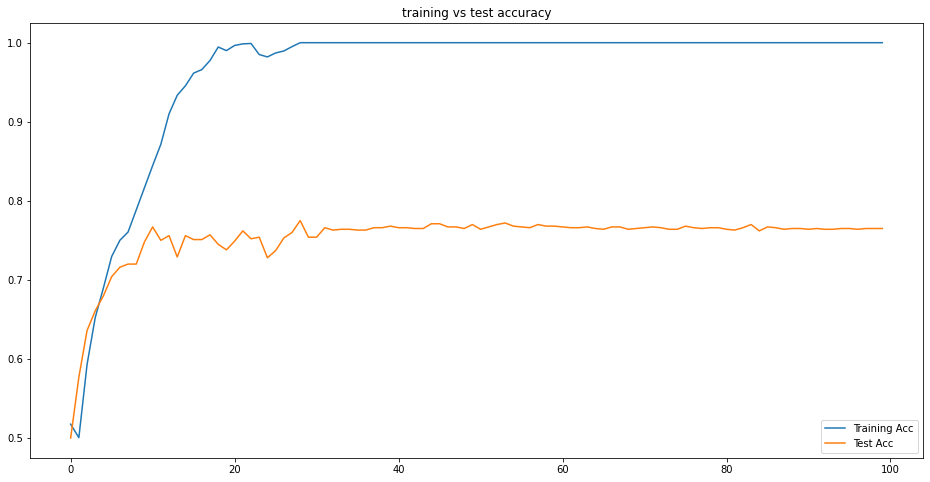

In [39]:
plt.figure(figsize=(16,8))
plt.plot(epoch_range,acc,label='Training Acc')
plt.plot(epoch_range,test_acc,label='Test Acc')
plt.legend(loc='lower right')
plt.title('training vs test accuracy')

Text(0.5, 1.0, 'training vs test loss')

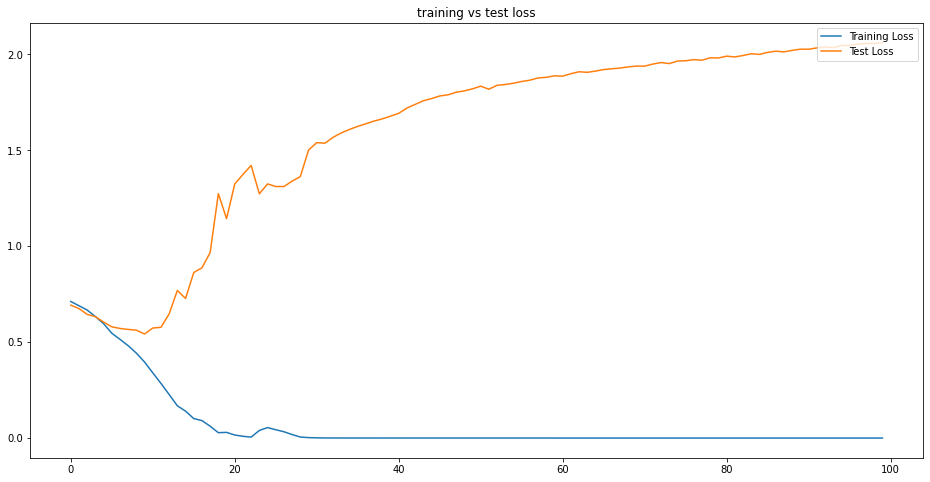

In [40]:
plt.figure(figsize=(16,8))
plt.plot(epoch_range,loss,label='Training Loss')
plt.plot(epoch_range,test_loss,label='Test Loss')
plt.legend(loc='upper right')
plt.title('training vs test loss')